# MENTAL HEALTH PREDICTION

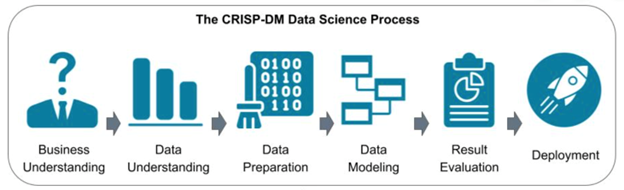

### **Business understanding**

***Step 1: Business Requirement Gathering***
*   Understand Project Obectives

### **Data Understanding**

***Step 2: Data Loading and Initial Exploration***
*   Data Dictionary/Overview
*   Load the Data
*   Initial Exploratory Data Analysis (EDA)

### **Data Preparation**

***Step 3: Data Cleaning***
*   Handle Missing Values
*   Feature Consistency and Parsing
*   Remove or Aggregate Low-Value Features

***Step 4: Feature Engineering***
*   Feature Encoding
*   Scaling and Normalization

***Step 5: Data Splitting***
*   Train-Test Split
*   StratifiedKfold Cross Validation

### **Data Modelling**

***Step 6: Model Selection***
*   Choose Candidate Models
*   Choose Model Hyperparameter Tuning Technique

***Step 7: Model Training***
*   Train Models
*   Model Hyperparameter Tuning

### **Result Evaluation**

***Step 8: Model Evaluation***
*   Evaluate Performance
*   Select the Best Model

***Step 9: Interpretability and Explainability***
*   Feature Importance

### **Deployment**

***Step 10: Model Deployment***
*   Model Serialization
*   API Development
*   Containerization
*   Monitoring and Logging
*   Continuous Improvement (Model Retraining)

### Import relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import joblib
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 2: Data Loading and Initial Exploration

- Data Dictionary
- Load the Data
- Initial Exploratory Data Analysis (EDA)

### Dataset Overview

This dataset contains information on individuals with various attributes related to their personal and lifestyle factors.

Features

Name: The full name of the individual.

Age: The age of the individual in years.

Marital Status: The marital status of the individual. Possible values include Single, Married, Divorced, and Widowed.

Education Level: The highest level of education attained by the individual. Possible values include High School, Associate Degree, Bachelor's Degree, Master's Degree, and PhD.

Number of Children: The number of children the individual has.

Smoking Status: Indicates whether the individual is a smoker or not. Possible values are Smoker,Former and Non-smoker.

Physical Activity Level: The level of physical activity undertaken by the individual. Possible values include Sedentary, Moderate, and Active.

Employment Status: The employment status of the individual. Possible values include Employed and Unemployed.

Income: The annual income of the individual in USD.

Alcohol Consumption: The level of alcohol consumption. Possible values include Low, Moderate, and High.

Dietary Habits: The dietary habits of the individual. Possible values include Healthy, Moderate, and Unhealthy.

Sleep Patterns: The quality of sleep. Possible values include Good, Fair, and Poor.

History of Mental Illness: Whether the individual has a history of mental illness. Possible values are Yes and No.

History of Substance Abuse: Whether the individual has a history of substance abuse. Possible values are Yes and No.

Family History of Depression: Indicates if there is a family history of depression. Possible values are Yes and No.

Chronic Medical Conditions: Whether the individual has chronic medical conditions. Possible values are Yes and No.

### Load the data

In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/depression_data.csv')

df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


### Initial Exploratory Data Analysis

We will explore the data to gain insights and better understand the data

In [3]:
# Display the first 5 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

- The dataset comprises 413768 rows and 16 columns with no missing values. The data types are also in order.

In [4]:
# Check the unique values of the variables
df.nunique()

,0
Name,196851
Age,63
Marital Status,4
Education Level,5
Number of Children,5
Smoking Status,3
Physical Activity Level,3
Employment Status,2
Income,405282
Alcohol Consumption,3


In [5]:
# Check the unique values of each column
for col in df.columns:
    print(f"Unique Values for column '{col}':")
    print(df[col].unique())
    print("\n" + "="*50 + "\n")  # Separator for readability

Unique Values for column 'Name':
['Christine Barker' 'Jacqueline Lewis' 'Shannon Church' ...
 'Madeline Butler' 'Travis Brewer' 'Gary Faulkner']


Unique Values for column 'Age':
[31 55 78 58 18 20 60 50 77 70 59 33 66 38 25 32 52 49 28 56 37 27 69 46
 67 22 26 72 34 53 44 62 51 23 24 35 61 65 63 73 71 76 43 54 40 39 21 19
 64 36 30 45 80 41 48 42 68 75 57 47 79 74 29]


Unique Values for column 'Marital Status':
['Married' 'Widowed' 'Divorced' 'Single']


Unique Values for column 'Education Level':
["Bachelor's Degree" 'High School' "Master's Degree" 'Associate Degree'
 'PhD']


Unique Values for column 'Number of Children':
[2 1 3 0 4]


Unique Values for column 'Smoking Status':
['Non-smoker' 'Former' 'Current']


Unique Values for column 'Physical Activity Level':
['Active' 'Sedentary' 'Moderate']


Unique Values for column 'Employment Status':
['Unemployed' 'Employed']


Unique Values for column 'Income':
[ 26265.67  42710.36 125332.79 ...  77353.26  24557.08 107125.74]


Unique V

In [6]:
# Check the value count of each column
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "="*50 + "\n")  # Separator for readability

Value counts for column 'Name':
Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64


Value counts for column 'Age':
Age
42    6740
47    6700
43    6700
24    6695
52    6693
      ... 
18    6470
65    6449
76    6442
35    6429
21    6381
Name: count, Length: 63, dtype: int64


Value counts for column 'Marital Status':
Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64


Value counts for column 'Education Level':
Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64


Value counts for column 'Number of Children':
Number of Children
0    155232
2    

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display columns with missing values

,0


In [8]:
# Check duplicate values
print("Number of duplicate rows:", df.duplicated().sum())
duplicate_rows = df[df.duplicated()]
duplicate_rows

Number of duplicate rows: 0


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions


In [9]:
# Statistical summary of numerical features
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


- Age: The dataset includes people aged between 18 and 80, with an average age of about 49 years. The age distribution is relatively spread out, as shown by a standard deviation of about 18 years.

- Income: Income varies widely, ranging from a minimum close to USD0 to a maximum of about USD210,000. The average income is around USD50,661, but most people have lower incomes, as shown by the 50th percentile (median) at USD37,520, with only 25% earning above $76,616.

- Number of Children: The average number of children per person is approximately 1.3. The data shows that half of the individuals have 1 child or none, and only 25% have 2 or more children, with a maximum of 4 children.

# Data Preparation

## Step 3: Data Cleaning

- Remove Low-Value Features

In [10]:
# Drop the Name column from the DataFrame
df = df.drop('Name', axis=1)

In [11]:
# Display the first few rows to verify
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


- The name column has been successfully dropped.

### Data Visualisation

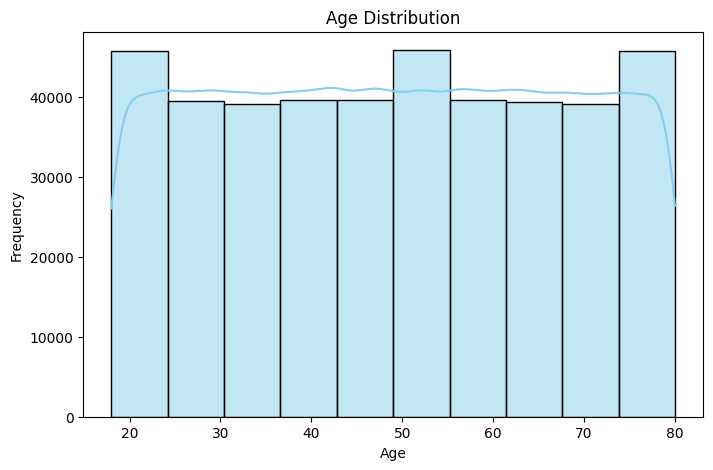

In [12]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

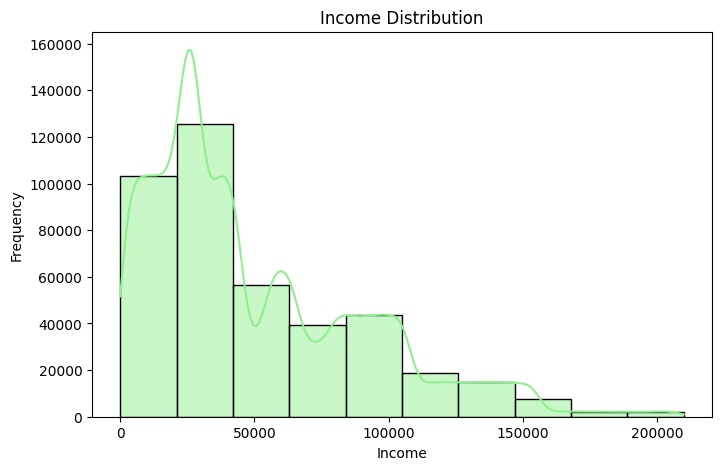

In [13]:
# Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=10, kde=True, color='lightgreen')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

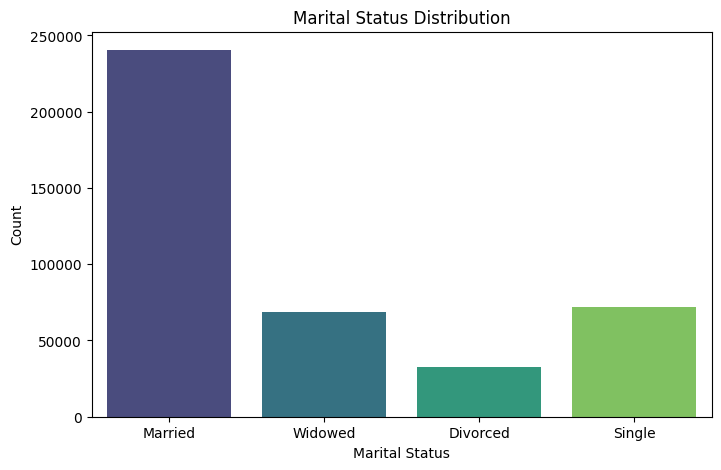

In [14]:
# Marital Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marital Status', palette='viridis')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

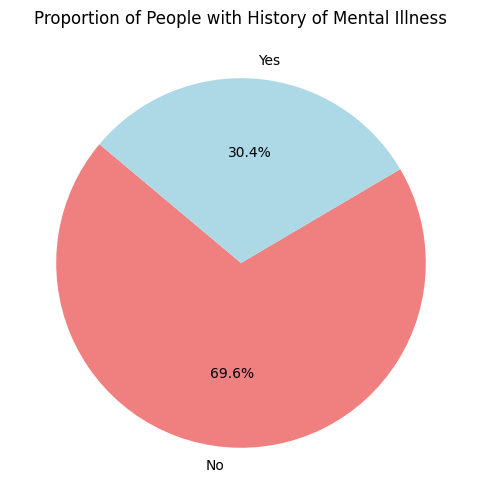

In [15]:
# Proportion of People with Mental Illness History
plt.figure(figsize=(6, 6))
mental_illness_counts = df['History of Mental Illness'].value_counts()
plt.pie(mental_illness_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=140)
plt.title('Proportion of People with History of Mental Illness')
plt.show()

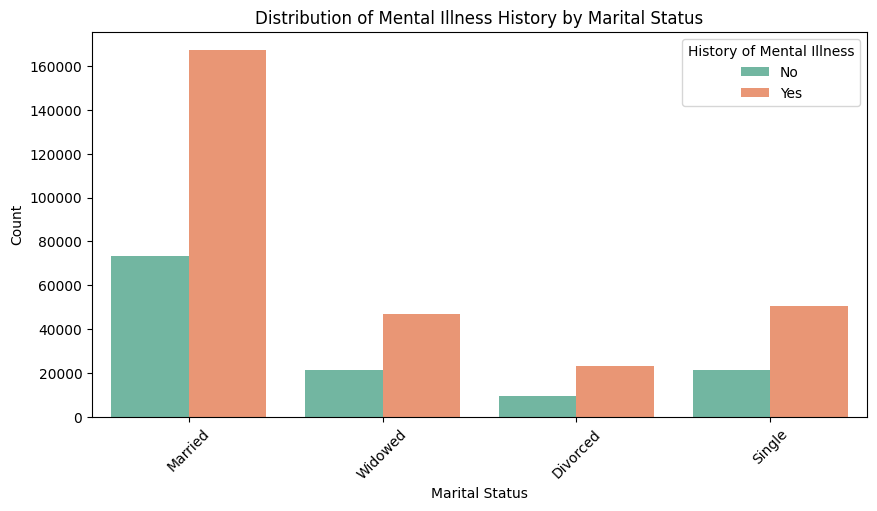

In [16]:
# Distribution of Mental Illness History by Marital Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Marital Status', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Marital Status")
plt.xlabel('Marital Status')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

- Those married are prone to depression than the singles, widowed and divorce.

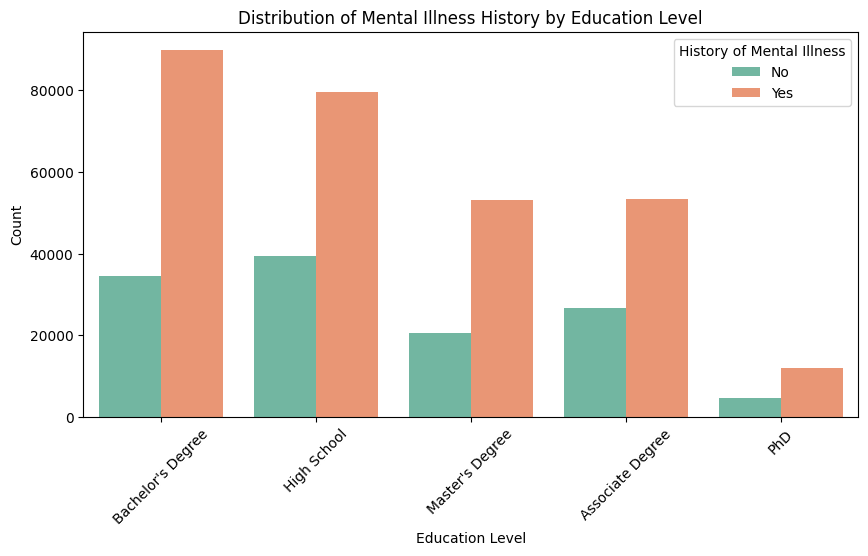

In [17]:
# Distribution of Mental Illness History by Education Level
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Education Level', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Education Level")
plt.xlabel('Education Level')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

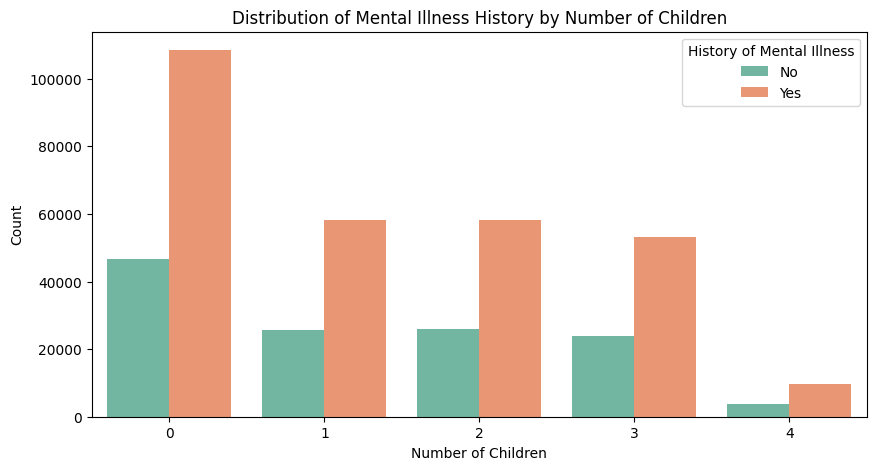

In [18]:
# Distribution of Mental Illness History by Number of Children
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Number of Children', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Number of Children")
plt.xlabel('Number of Children')
plt.ylabel("Count")
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

- Those without children are prone to depression than those with children.

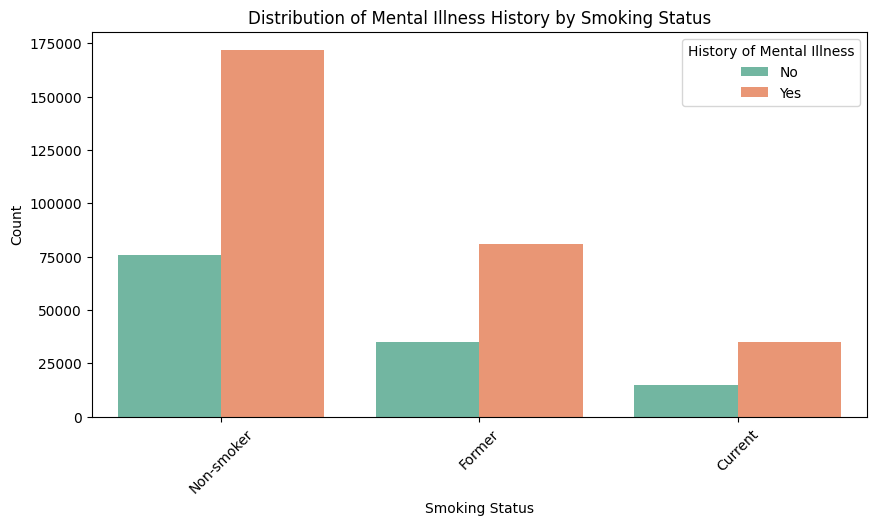

In [19]:
# Distribution of Mental Illness History by Smoking Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Smoking Status', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Smoking Status")
plt.xlabel('Smoking Status')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

- Non-smokers are prone to depression than former and current smokers.

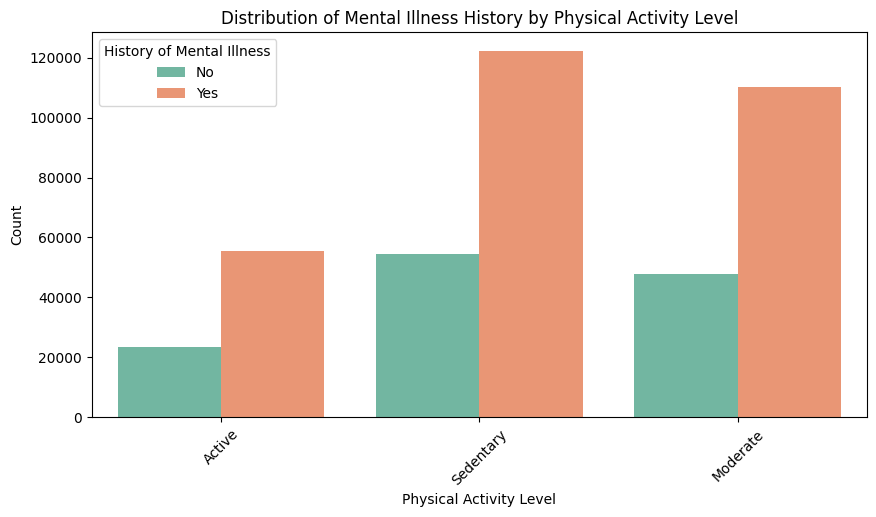

In [20]:
# Distribution of Mental Illness History by Physical Activity Level
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Physical Activity Level', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Physical Activity Level")
plt.xlabel('Physical Activity Level')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

- Those with sedentary and moderate physical activity level are prone to depression than those active physical activity level.

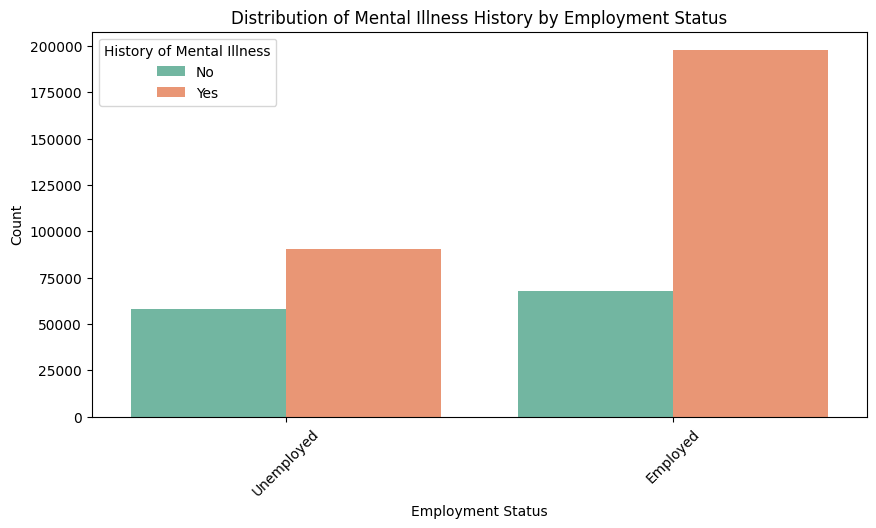

In [21]:
# Distribution of Mental Illness History by Employment Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Employment Status', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Employment Status")
plt.xlabel('Employment Status')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

- Those employed are prone to depression than those unemployed.

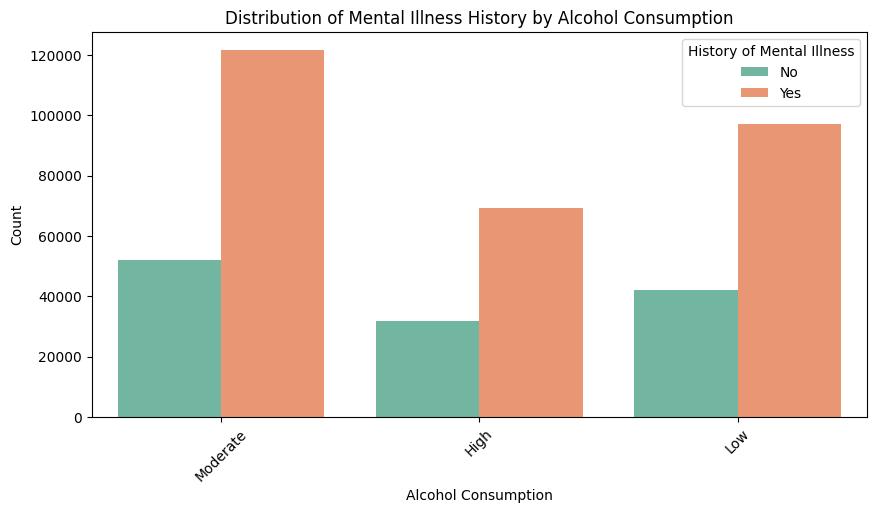

In [22]:
# Distribution of Mental Illness History by Alcohol Consumption
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Alcohol Consumption', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Alcohol Consumption")
plt.xlabel('Alcohol Consumption')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

- Those with moderate and low alcohol consumption are prone to depression than those with high alcohol consumption.

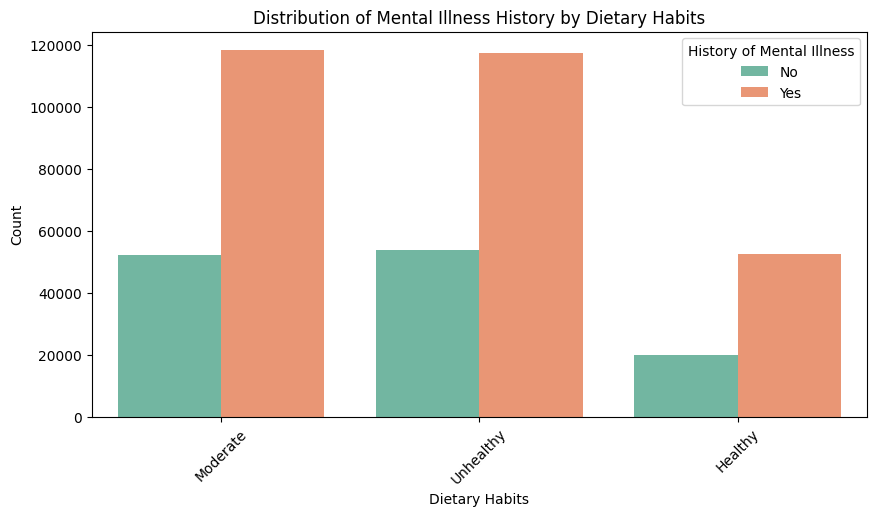

In [23]:
# Distribution of Mental Illness History by Dietary Habits
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Dietary Habits', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Dietary Habits")
plt.xlabel('Dietary Habits')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

- Those with unhealthy and moderate dietary habits are prone to depression than those with with healthy dietary habits.

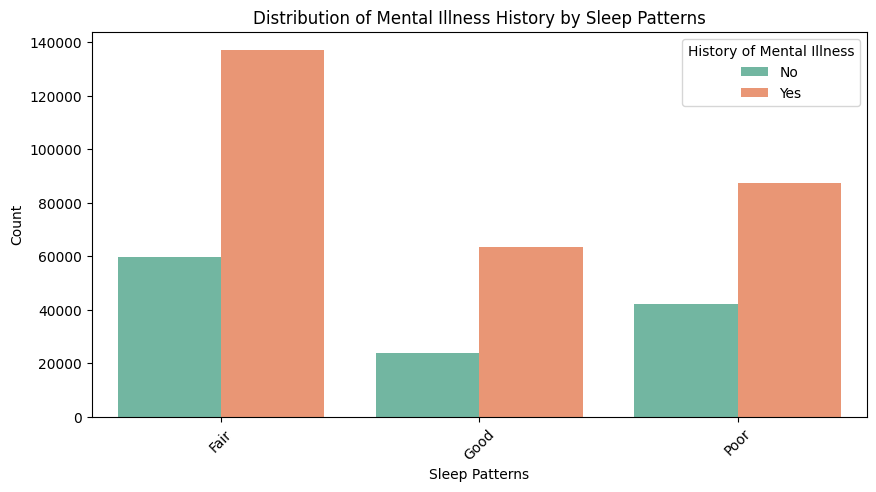

In [24]:
# Distribution of Mental Illness History by Sleep Patterns
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sleep Patterns', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Sleep Patterns")
plt.xlabel('Sleep Patterns')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()


- Those with poor and fair sleep pattern are prone to depression than those with with good sleep. This is very realistic.

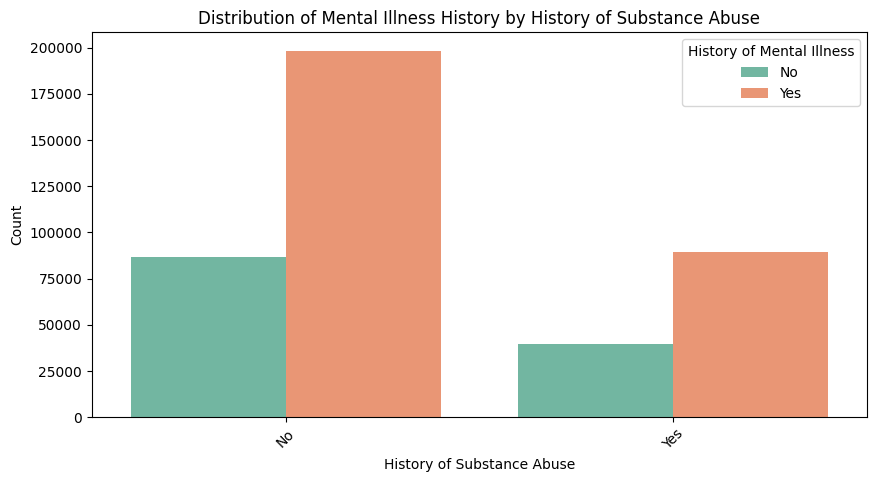

In [25]:
# Distribution of Mental Illness History by History of Substance Abuse
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='History of Substance Abuse', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by History of Substance Abuse")
plt.xlabel('History of Substance Abuse')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()


- Those with no history of substance abuse are prone to depression than those with history of substance abuse.

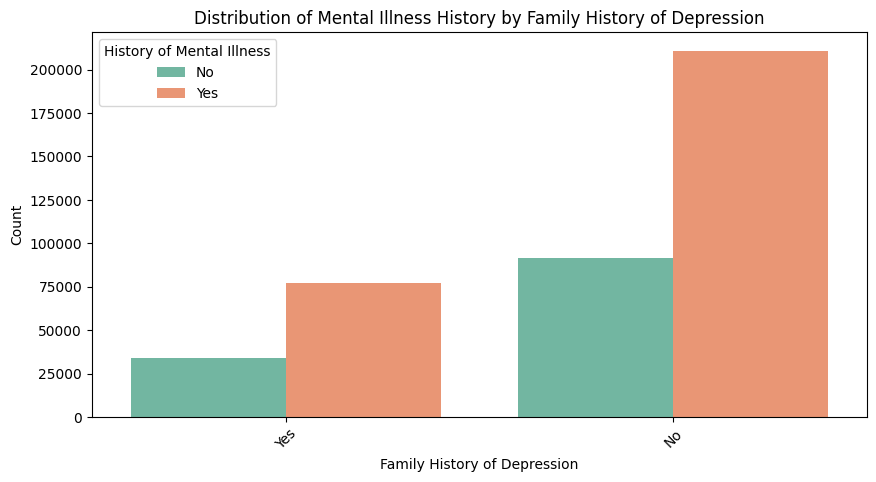

In [26]:
# Distribution of Mental Illness History by Family History of Depression
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Family History of Depression', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Family History of Depression")
plt.xlabel('Family History of Depression')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

- Those with no family history of depression are prone to depression than those with family history of depression.

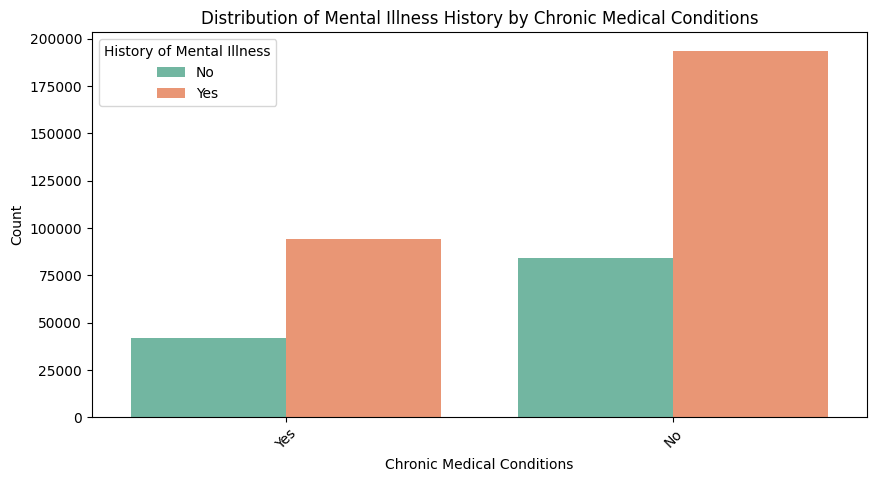

In [27]:
# Distribution of Mental Illness History by Chronic Medical Conditions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Chronic Medical Conditions', hue='History of Mental Illness', palette='Set2')
plt.title("Distribution of Mental Illness History by Chronic Medical Conditions")
plt.xlabel('Chronic Medical Conditions')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()


- The plot indicates that those without chronic medical conditions have mental illness history than those with chronic medical conditions.

**NOTE**

The visualizations clearly indicate that the dataset is synthetic and mostly does not reflect real-world scenarios. This suggests that the model may face difficulties in learning effectively due to this discrepancy.

## Step 4: Feature Engineering and Data Visualisation

- Feature Selection
- Feature Encoding
- Scaling and Normalization (Not NECESSARY due to the choice of model)

### Selection of Categorical Feature with Chi Square

In [28]:
# Define the target variable and separate it from the features
target = 'History of Mental Illness'
X = df.drop(columns=[target])
y = df[target].map({'Yes': 1, 'No': 0})  # Encoding target as binary

In [29]:
# List of categorical features to test (excluding target variable)
categorical_features = [
    'Marital Status', 'Education Level', 'Number of Children', 'Smoking Status',
    'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
    'Dietary Habits', 'Sleep Patterns', 'History of Substance Abuse',
    'Family History of Depression', 'Chronic Medical Conditions'
]

# Initialize dictionary to store results
chi2_results = {}

# Perform Chi-Square test for each categorical feature
for feature in categorical_features:
    # Create a contingency table for the feature and target
    contingency_table = pd.crosstab(df[feature], df[target])

    # Perform the Chi-Square test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    # Store the result
    chi2_results[feature] = {'chi2_stat': chi2_stat, 'p_value': p_value}

# Display results
print("Chi-Square Test Results:")
for feature, results in chi2_results.items():
    print(f"{feature}: Chi2 Stat = {results['chi2_stat']:.2f}, p-value = {results['p_value']:.4f}")

Chi-Square Test Results:
Marital Status: Chi2 Stat = 64.85, p-value = 0.0000
Education Level: Chi2 Stat = 1400.39, p-value = 0.0000
Number of Children: Chi2 Stat = 45.04, p-value = 0.0000
Smoking Status: Chi2 Stat = 11.44, p-value = 0.0033
Physical Activity Level: Chi2 Stat = 30.36, p-value = 0.0000
Employment Status: Chi2 Stat = 8197.97, p-value = 0.0000
Alcohol Consumption: Chi2 Stat = 76.29, p-value = 0.0000
Dietary Habits: Chi2 Stat = 362.30, p-value = 0.0000
Sleep Patterns: Chi2 Stat = 591.68, p-value = 0.0000
History of Substance Abuse: Chi2 Stat = 1.23, p-value = 0.2666
Family History of Depression: Chi2 Stat = 9.86, p-value = 0.0017
Chronic Medical Conditions: Chi2 Stat = 15.06, p-value = 0.0001


- History of Substance Abuse will be considered for exclusion from the model. Since it doesn't show a significant association with the target variable, removing it can reduce model complexity and potentially improve performance by eliminating noise.	All other features with p-values less than 0.05 will be retained as they contribute meaningful information for predicting mental illness history.

### Correlation Analysis

In [30]:
# Convert 'Yes'/'No' values to binary for target columns for better plotting
binary_map = {'Yes': 1, 'No': 0}
df['History of Mental Illness'] = df['History of Mental Illness'].map(binary_map)
df['History of Substance Abuse'] = df['History of Substance Abuse'].map(binary_map)
df['Family History of Depression'] = df['Family History of Depression'].map(binary_map)
df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].map(binary_map)

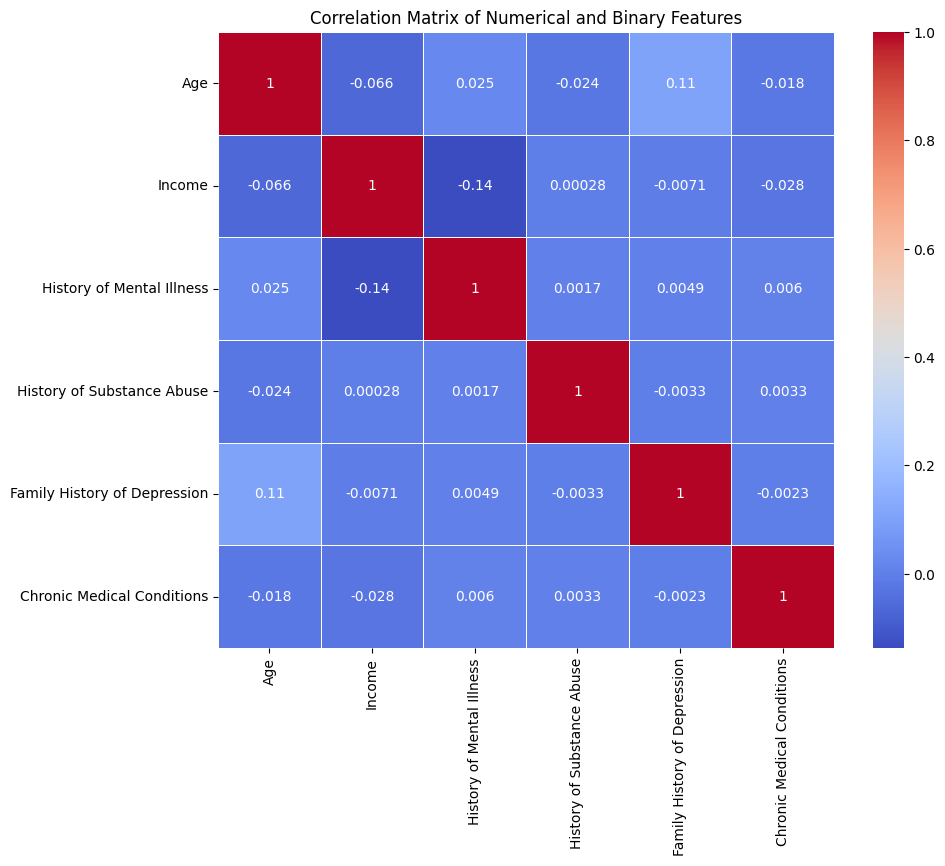

In [31]:
# Heatmap of Correlations Among Numerical and Binary Features
plt.figure(figsize=(10, 8))
# Selecting only continuous and binary columns
correlation_data = df[['Age', 'Income', 'History of Mental Illness', 'History of Substance Abuse',
                       'Family History of Depression', 'Chronic Medical Conditions']]
corr_matrix = correlation_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical and Binary Features')
plt.show()

- There is a very weak relationship between the features and the target. Additionaly, income has a negative relationship with the target and will be dropped.

In [32]:
# Drop the Name column from the DataFrame
X = X.drop(['History of Substance Abuse', 'Income'], axis=1)

- The income and History of Substance Abuse features have been dropped.

### Feature Encoding

In [33]:
# Defining column groups based on encoding strategies
continuous_features = ['Age']
ordinal_features = ['Education Level', 'Physical Activity Level', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns']
ordinal_mappings = [
    ["Bachelor's Degree", 'High School', 'Associate Degree', "Master's Degree", 'PhD'],  # Education Level in order
    ['Sedentary', 'Moderate', 'Active'],  # Physical Activity Level
    ['Low', 'Moderate', 'High'],  # Alcohol Consumption levels
    ['Unhealthy', 'Moderate', 'Healthy'],  # Dietary habits in order
    ['Poor', 'Fair', 'Good']  # Sleep patterns in order
]
onehot_features = ['Marital Status', 'Smoking Status']
binary_features = ['Employment Status',  'Family History of Depression', 'Chronic Medical Conditions']

### Creating transformers for each encoding type

In [34]:
# Ordinal encoding for ordered categorical features
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=ordinal_mappings))
])

# One-hot encoding for unordered categorical features
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # drop='first' to avoid multicollinearity
])

# Binary encoding for binary features
# For binary features, we map values to 0/1
X[binary_features] = X[binary_features].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'Employed': 1, 'Unemployed': 0}))

# Applying all transformations in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),  # Only ordinal encoding
        ('onehot', onehot_transformer, onehot_features),  # One-hot encoding
        ('passthrough', 'passthrough', binary_features)  # Keep binary features as they are
    ],
    remainder='passthrough'  # Pass through continuous features as they are (without scaling)
)

# Creating a pipeline for further modeling (e.g., Random Forest, etc.)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fitting the preprocessor and transforming the dataset
X_transformed = pipeline.fit_transform(X)

# Display the transformed data (for demonstration)
print("Transformed Feature Matrix (X):")
print(X_transformed)

print("\nTarget Variable (y):")
print(y)

Transformed Feature Matrix (X):
[[ 0.  2.  1. ...  1. 31.  2.]
 [ 1.  0.  2. ...  1. 55.  1.]
 [ 3.  0.  0. ...  0. 78.  1.]
 ...
 [ 0.  0.  1. ...  1. 57.  0.]
 [ 2.  0.  1. ...  0. 71.  2.]
 [ 3.  1.  1. ...  0. 62.  0.]]

Target Variable (y):
0         1
1         1
2         0
3         0
4         1
         ..
413763    0
413764    1
413765    0
413766    0
413767    0
Name: History of Mental Illness, Length: 413768, dtype: int64


## Step 5: Data Splitting

- Train-Test Split

In [35]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Data Modelling and Result Evaluation

Step 6: Model Selection
- Choose Candidate Models: Tree-based models (Random Forest and XGBoost) were chosen for this project due to their ability to handle complex relationships and patterns between features unlike logistic regression. Mental health outcomes are often influenced by nonlinear relationships.
- Choose Model Hyperparameter Tuning Technique (Grid Search)

Step 7: Model Training
- Train Models
- Model Hyperparameter Tuning

Step 8: Model Evaluation
- Evaluate Performance
- Select the Best Model

In [36]:
# Create a list for the actual class names in the order of their encoded labels
class_names = ['No', 'Yes']

# Initialize models with baseline parameters
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Save the trained model to a file
    model_filename = f"{model_name.replace(' ', '_')}_model.joblib"
    dump(model, model_filename)
    print(f"{model_name} saved as {model_filename}")

    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))
    print("-" * 40)

Training Random Forest...
Random Forest saved as Random_Forest_model.joblib
Random Forest Accuracy: 0.6245
Classification Report:
               precision    recall  f1-score   support

          No       0.70      0.79      0.75     57589
         Yes       0.34      0.24      0.28     25165

    accuracy                           0.62     82754
   macro avg       0.52      0.52      0.51     82754
weighted avg       0.59      0.62      0.60     82754

----------------------------------------
Training XGBoost...
XGBoost saved as XGBoost_model.joblib
XGBoost Accuracy: 0.6948
Classification Report:
               precision    recall  f1-score   support

          No       0.70      1.00      0.82     57589
         Yes       0.41      0.01      0.02     25165

    accuracy                           0.69     82754
   macro avg       0.55      0.50      0.42     82754
weighted avg       0.61      0.69      0.57     82754

----------------------------------------


### Hyperparameter Tuning

In [37]:
# Define parameter grid for Random Forest with class weights
param_grid_rf_weighted = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Initialize GridSearchCV with weighted Random Forest
grid_search_rf_weighted = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf_weighted,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Train the model using grid search
grid_search_rf_weighted.fit(X_train, y_train)

# Get the best estimator and parameters from the grid search
best_rf_weighted = grid_search_rf_weighted.best_estimator_
print("Best Parameters for Weighted Random Forest:", grid_search_rf_weighted.best_params_)
print("Best Weighted F1-Score from Grid Search:", grid_search_rf_weighted.best_score_)

# Use the best model to make predictions on the test set
y_pred = best_rf_weighted.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Tuned Random Forest: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Save the tuned model
model_filename = "Tuned_Random_Forest_model.joblib"
dump(best_rf_weighted, model_filename)
print(f"Tuned model saved as {model_filename}")

Best Parameters for Weighted Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Weighted F1-Score from Grid Search: 0.6208445132426113
Accuracy of Tuned Random Forest: 0.6080
Classification Report:
               precision    recall  f1-score   support

          No       0.74      0.67      0.70     57589
         Yes       0.38      0.47      0.42     25165

    accuracy                           0.61     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.61      0.62     82754

Tuned model saved as Tuned_Random_Forest_model.joblib


### Data Balancing (SMOTE)

In [38]:
# Define SMOTE and classifier in a pipeline
pipeline = Pipeline(steps=[
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE to oversample minority classes
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

          No       0.71      0.76      0.73     57589
         Yes       0.34      0.28      0.30     25165

    accuracy                           0.61     82754
   macro avg       0.52      0.52      0.52     82754
weighted avg       0.59      0.61      0.60     82754

